In [7]:
!pip install -q transformers

In [8]:
!pip install -q datasets

In [9]:
!pip install -q evaluate

In [10]:
!pip install -q accelerate

In [11]:
!pip install -q gluonts ujson

In [36]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict

df = pd.read_csv('2022-05-29_04-40-00.csv')

future_days = 7
prediction_length = 12 * 24 * future_days + 12*2# five minutes intervals * hours * days + tail we use due to start indexing at 12pm

whole_list = np.array([i[0] for i in df.values])

train =  whole_list[:-2*prediction_length] # assume twice the prediction horizon
val = whole_list[:-prediction_length]
test = whole_list


In [37]:
tdf = pd.DataFrame({"start": ['2022-05-29 04:40:00','2022-05-29 04:40:00'], "target": [train, train]})
vdf = pd.DataFrame({"start": ['2022-05-29 04:40:00', '2022-05-29 04:40:00'], "target": [val, val]})
testdf = pd.DataFrame({"start": ['2022-05-29 04:40:00','2022-05-29 04:40:00'], "target": [test, test]})
tds = Dataset.from_pandas(tdf)
vds = Dataset.from_pandas(vdf)
testdf = Dataset.from_pandas(testdf)

ds = DatasetDict()

ds['train'] = tds
ds['validation'] = vds
ds['test'] = testdf

print(ds)
dataset = ds

DatasetDict({
    train: Dataset({
        features: ['start', 'target'],
        num_rows: 2
    })
    validation: Dataset({
        features: ['start', 'target'],
        num_rows: 2
    })
    test: Dataset({
        features: ['start', 'target'],
        num_rows: 2
    })
})


In [38]:
train_example = dataset["train"][0]
train_example.keys()

dict_keys(['start', 'target'])

In [39]:
print(train_example["start"])
print(train_example["target"])

2022-05-29 04:40:00
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

The initial values are exactly the same as the corresponding training example:

In [40]:
validation_example = dataset["validation"][0]

print(validation_example["start"])
print(validation_example["target"])

2022-05-29 04:40:00
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [41]:
test_example = dataset["test"][0]
test_example.keys()

print(test_example["start"])
print(test_example["target"])

2022-05-29 04:40:00
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [42]:
print(len(train_example["target"]) + prediction_length * 2, len(validation_example["target"]) +  prediction_length, len(test_example["target"]), prediction_length)

79720 79720 79720 2040


In [43]:
freq = "5T"

assert len(train_example["target"]) + prediction_length == len(validation_example["target"])

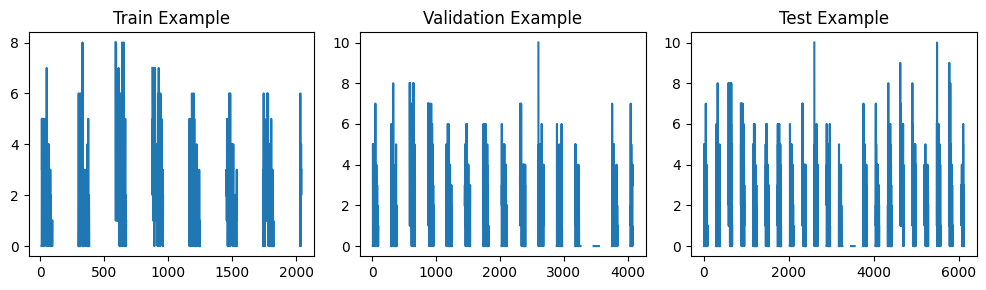

In [44]:
import matplotlib.pyplot as plt

# Create a 3x1 subplot layout
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Plot the train example
axes[0].plot(train_example["target"][-prediction_length:], label="Train")
axes[0].set_title('Train Example')
# axes[0].legend()

# Plot the validation example
axes[1].plot(validation_example["target"][-prediction_length*2:], label="Validation")
axes[1].set_title('Validation Example')
# axes[1].legend()

# Plot the test example
axes[2].plot(test_example["target"][-prediction_length*3:], label="Test")
axes[2].set_title('Test Example')
# axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [45]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [46]:
from functools import lru_cache

import pandas as pd
import numpy as np


@lru_cache(10_000)
def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)


def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch

In [47]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

In [48]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)

[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 22, 23, 24, 25, 26, 34, 35, 36, 37, 38, 287, 288, 289, 575, 576, 577, 863, 864, 865, 1151, 1152, 1153]


In [49]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function minute_of_hour at 0x7fd72d306160>, <function hour_of_day at 0x7fd72d306700>, <function day_of_week at 0x7fd72d306820>, <function day_of_month at 0x7fd72d306940>, <function day_of_year at 0x7fd72d306a60>]


In [50]:

from transformers import InformerConfig, InformerForPrediction
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction
from transformers import AutoformerConfig, AutoformerForPrediction


def create_model(model_name = 'Informer', LARGE_TEST = False):

    match model_name:

      case 'Time_Series_Transformer':
          config = TimeSeriesTransformerConfig(
          prediction_length=prediction_length,
          context_length=prediction_length * 2,
          lags_sequence=lags_sequence,
          # we'll add 2 time features ("month of year" and "age", see further):
          num_time_features=len(time_features) + 1, #TODO think how to edit these better
          cardinality=[len(train_dataset)],
          embedding_dimension=[2],
        
        #   d_model = 128,
        #   encoder_layers = 4,
        #   decoder_layers = 6,
        #   encoder_attention_heads = 8,
        #   decoder_attention_heads = 8,
      )

          model = TimeSeriesTransformerForPrediction(config)

      case 'Informer':
          config = InformerConfig(
          prediction_length=prediction_length,
          context_length=prediction_length * 2,
          lags_sequence=lags_sequence,
          num_time_features=len(time_features) + 1,
          cardinality=[len(train_dataset)],
          embedding_dimension=[2],
          dropout=0.1,
        #   d_model = 128,
        #   encoder_layers = 6,
        #   decoder_layers = 6,
        #   encoder_attention_heads = 8,
        #   decoder_attention_heads = 8,
      )

          model = InformerForPrediction(config)

      case 'Autoformer':
          config = AutoformerConfig(
          prediction_length=prediction_length,
          context_length=prediction_length * 2,
          lags_sequence=lags_sequence,
          num_time_features=len(time_features) + 1,
          cardinality=[len(train_dataset)],
          embedding_dimension=[2],
          
        #   d_model = 128,
        #   encoder_layers = 4,
        #   decoder_layers = 6,
        #   encoder_attention_heads = 8,
        #   decoder_attention_heads = 8,
      )

          model = AutoformerForPrediction(config)
    return model, config

model, config = create_model('Informer')

SyntaxError: invalid syntax (2683332759.py, line 8)

In [51]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

In [52]:
from transformers import PretrainedConfig


def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    # a bit like torchvision.transforms.Compose
    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # month of year in the case when freq="M"
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in the life the value of the time series is
            # sort of running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )

In [53]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional


def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )

In [54]:
from typing import Iterable

import torch
from gluonts.itertools import Cyclic, Cached
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream)

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )

In [55]:
def create_backtest_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data)

    # We create a Validation Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "validation")

    # we apply the transformations in train mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=True)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )

In [56]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # We create a test Instance splitter to sample the very last
    # context window from the dataset provided.
    instance_sampler = create_instance_splitter(config, "test")

    # We apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )

In [57]:
BATCH_SIZE = 32


train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_dataset,
    batch_size=BATCH_SIZE,
    num_batches_per_epoch=300, #do all the batches
)

test_dataloader = create_backtest_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=BATCH_SIZE,
)

NameError: name 'config' is not defined

Let's check the first batch:

In [58]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())

NameError: name 'train_dataloader' is not defined

As can be seen, we don't feed `input_ids` and `attention_mask` to the encoder (as would be the case for NLP models), but rather `past_values`, along with `past_observed_mask`, `past_time_features`, and `static_categorical_features`.

The decoder inputs consist of `future_values`, `future_observed_mask` and `future_time_features`. The `future_values` can be seen as the equivalent of `decoder_input_ids` in NLP.

We refer to the [docs](https://huggingface.co/docs/transformers/model_doc/time_series_transformer#transformers.TimeSeriesTransformerForPrediction.forward.past_values) for a detailed explanation for each of them.

## Forward pass

Let's perform a single forward pass with the batch we just created:

In [59]:
# perform forward pass
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)

NameError: name 'model' is not defined

In [60]:
print("Loss:", outputs.loss.item())

NameError: name 'outputs' is not defined

Note that the model is returning a loss. This is possible as the decoder automatically shifts the `future_values` one position to the right in order to have the labels. This allows computing a loss between the predicted values and the labels.

Also note that the decoder uses a causal mask to not look into the future as the values it needs to predict are in the `future_values` tensor.

## Train the Model

It's time to train the model! We'll use a standard PyTorch training loop.

We will use the 🤗 [Accelerate](https://huggingface.co/docs/accelerate/index) library here, which automatically places the model, optimizer and dataloader on the appropriate `device`.

In [61]:
from accelerate import Accelerator
from torch.optim import AdamW
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

EPOCHS = 5
RECOMPUTE_TRAINING = False

# Initialize the Accelerator
accelerator = Accelerator()
device = accelerator.device

# Log information about GPU usage
print('Using device:', device)
print(f'Number of GPUs available: {torch.cuda.device_count()}')
print(f'Distributed training: {accelerator.distributed_type}')

if torch.cuda.is_available():
    print("GPU Information:")
    for i in range(torch.cuda.device_count()):
        print(f"  GPU {i}: {torch.cuda.get_device_name(i)}")

if RECOMPUTE_TRAINING:
    for model_name in ['Time_Series_Transformer', 'Informer', 'Autoformer']:
        print(f"\nTraining ====> {model_name}")
        model, _ = create_model(model_name)
        
        optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-4)
        
        model, optimizer, train_dataloader = accelerator.prepare(
            model,
            optimizer,
            train_dataloader,
        )
        
        # Log information about model distribution
        if isinstance(model, torch.nn.parallel.DistributedDataParallel):
            print(f"Model is distributed across {torch.distributed.get_world_size()} GPUs")
        else:
            print("Model is not distributed")
        
        losses = []
        
        model.train()
        start_time = time.time()
        for epoch in tqdm(range(EPOCHS), desc="Epochs"):
            for idx, batch in enumerate(tqdm(train_dataloader, desc="Batches", leave=False)):
                optimizer.zero_grad()
                
                # Move batch to device (this is handled by accelerator.prepare, but we'll keep it for clarity)
                batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
                
                outputs = model(
                    static_categorical_features=batch["static_categorical_features"]
                    if config.num_static_categorical_features > 0
                    else None,
                    static_real_features=batch["static_real_features"]
                    if config.num_static_real_features > 0
                    else None,
                    past_time_features=batch["past_time_features"],
                    past_values=batch["past_values"],
                    future_time_features=batch["future_time_features"],
                    future_values=batch["future_values"],
                    past_observed_mask=batch["past_observed_mask"],
                    future_observed_mask=batch["future_observed_mask"],
                )
                loss = outputs.loss
                
                # Backpropagation
                accelerator.backward(loss)
                optimizer.step()
                
                # Track the loss
                losses.append(loss.item())
                
                if idx % 100 == 0 and accelerator.is_main_process:
                    print(f"Epoch {epoch+1}/{EPOCHS} | Step {idx} | Loss: {loss.item()}")
        
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Training time for {model_name}: {training_time:.2f} seconds")
        
        # Save the model weights
        if accelerator.is_main_process:
            model_save_path = f'learned_model_weights/{model_name}_weights.pth'
            accelerator.wait_for_everyone()
            unwrapped_model = accelerator.unwrap_model(model)
            torch.save(unwrapped_model.state_dict(), model_save_path)
            print(f"Model weights saved to {model_save_path}")
        
        # Plot the loss curve
        if accelerator.is_main_process:
            plt.figure(figsize=(10, 5))
            plt.plot(losses, label="Training Loss")
            plt.xlabel("Iteration")
            plt.ylabel("Loss")
            plt.title(f"Training Loss Curve for {model_name}")
            plt.legend()
            plt.savefig(f'loss_curves/{model_name}_loss_curve.png')
            plt.show()

Using device: cuda
Number of GPUs available: 2
Distributed training: NO
GPU Information:
  GPU 0: NVIDIA RTX A6000
  GPU 1: NVIDIA RTX A6000


## Inference

At inference time, it's recommended to use the `generate()` method for autoregressive generation, similar to NLP models.

Forecasting involves getting data from the test instance sampler, which will sample the very last `context_length` sized window of values from each time series in the dataset, and pass it to the model. Note that we pass `future_time_features`, which are known ahead of time, to the decoder.

The model will autoregressively sample a certain number of values from the predicted distribution and pass them back to the decoder to return the prediction outputs:

In [62]:
from tqdm import tqdm
import warnings
import json

warnings.filterwarnings('ignore')

models_forecasts = {}

RECOMPUTE_INFERENCE = False

if RECOMPUTE_INFERENCE:
    
    #=================Inference different models=================
    
    for model_name in ['Time_Series_Transformer', 'Informer', 'Autoformer']:
        
        model, _ = create_model(model_name)
        model_save_path = f'learned_model_weights/{model_name}_weights.pth'
        model.load_state_dict(torch.load(model_save_path))
        model.to(device)
        model.eval()

        forecasts = None


        for batch in test_dataloader:
            outputs = model.generate(
                static_categorical_features=batch["static_categorical_features"].to(device)
                if config.num_static_categorical_features > 0
                else None,
                static_real_features=batch["static_real_features"].to(device)
                if config.num_static_real_features > 0
                else None,
                past_time_features=batch["past_time_features"].to(device),
                past_values=batch["past_values"].to(device),
                future_time_features=batch["future_time_features"].to(device),
                past_observed_mask=batch["past_observed_mask"].to(device),
            )
            if forecasts is None:
                forecasts = np.array(outputs.sequences.cpu().numpy())
            else:
                forecasts = np.concatenate((forecasts, outputs.sequences.cpu().numpy()), axis=1)
                

        forecasts = np.vstack(forecasts)
        print(model_name)
        models_forecasts[model_name] = forecasts
        print('loaded model and performed inference for:', model_name)
    
    #=================Bootstraping=================
    from datetime import datetime
    all_requests = pd.read_csv('online_requests.csv')
    all_requests

    #TODO this should be sampled only from the test set
    boot_df = pd.read_csv('online_requests.csv')

    def generate_pickup_time(pickup_datetime: datetime):
        if pickup_datetime.hour < 19:
            new_pickup_time = (((((pickup_datetime.hour + 24) - 19) * 60) \
                                    + pickup_datetime.minute) * 60) + pickup_datetime.second
        else:
            new_pickup_time = ((((pickup_datetime.hour - 19) * 60) \
                                    + pickup_datetime.minute) * 60) + pickup_datetime.second
        return new_pickup_time
        
    forecasts = None

    for _ in tqdm(range(400)):
        mean = 125.73 #this we precomputed on the dataset
        std = 71.22
        num_requests_to_sample = int(np.random.normal(mean, std, 1)[0])
        num_requests_to_sample = max(2, num_requests_to_sample)
        
        all_requests['Requested Pickup Time'] = pd.to_datetime(all_requests['Requested Pickup Time'])
        all_requests = all_requests[all_requests['Requested Pickup Time'].apply(lambda x: x.hour >= 19 or x.hour < 2)]
        sampled_requests = all_requests.sample(n=num_requests_to_sample, replace=True, random_state=42)
        sampled_requests['Requests Pickup Times Timestamped'] = sampled_requests['Requested Pickup Time'].apply(lambda x: generate_pickup_time(x))
        sampled_requests = sampled_requests.sort_values(by=['Requests Pickup Times Timestamped'])
        sampled_requests = pd.DataFrame(sampled_requests['Requested Pickup Time'].dt.time)
        sampled_requests['Requested Pickup Time'] = pd.to_datetime(sampled_requests['Requested Pickup Time'],format='%H:%M:%S')
        sampled_requests['Rounded Time'] = sampled_requests['Requested Pickup Time'].dt.floor('5T').dt.time
        grouped = sampled_requests.groupby('Rounded Time').size().reset_index(name='Count')

        time_range = pd.date_range(start='00:00', end='23:55', freq='5T').time
        complete_df = pd.DataFrame({'Rounded Time': time_range})
        merged_df = pd.merge(complete_df, grouped, on='Rounded Time', how='left')
        merged_df['Count'].fillna(0, inplace=True)
        output = merged_df['Count'].to_numpy().reshape(1, -1)
        
        
        if forecasts is None:
            forecasts = output
        else:
            forecasts = np.concatenate((forecasts, output), axis=0)
        

    models_forecasts['Bootstraping'] = forecasts    
    
    #=================Save the forecasts=================
        
    serializable_models_forecasts = {k: v.tolist() if isinstance(v, np.ndarray) else v for k, v in models_forecasts.items()}
    

    with open('models_forecasts.json', 'w') as file:
        json.dump(serializable_models_forecasts, file) #pickle this in future

In [63]:
import json
import numpy as np

# Load the JSON file back into a dictionary
with open('models_forecasts.json', 'r') as file:
    loaded_data = json.load(file)

# Convert lists back to numpy arrays if needed
models_forecasts = {k: np.array(v) if isinstance(v, list) else v for k, v in loaded_data.items()}

In [64]:
models_forecasts.keys()

dict_keys(['Time_Series_Transformer', 'Informer', 'Autoformer', 'Bootstraping'])

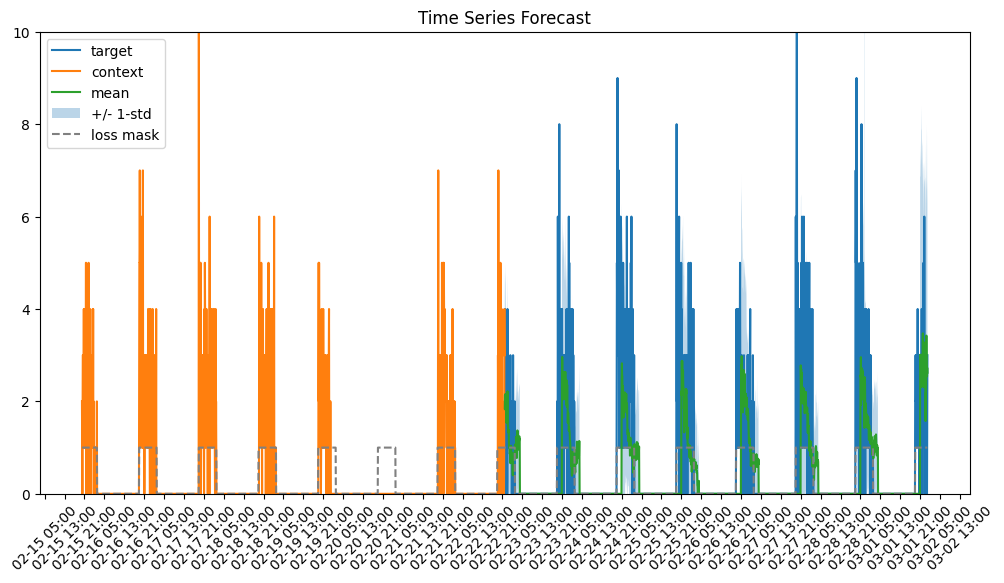

In [65]:
import matplotlib.dates as mdates

def plot(ts_index, forecasts):
    fig, ax = plt.subplots(figsize=(12, 6))  # A4 size in inches (11.7 x 8.3) and 300 DPI

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()

    # Major ticks every 1 hour, minor ticks every 1 hour
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=8))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=8))

    # Format the x-axis to show the whole date with hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

    # Rotate the x-axis labels to 45 degrees
    plt.xticks(rotation=45)
    
    ax.plot(
        index[-prediction_length:],
        [i if i else 0 for i in test_dataset[ts_index]["target"][-prediction_length:]],
        label="target",
    )
    
    ax.plot(
        index[-2 * prediction_length : -prediction_length],
        [i if i else 0 for i in test_dataset[0]["target"][-2 * prediction_length : -prediction_length]],
        label="context",
    )

    mask = np.array([1 if i is not None else 0 for i in test_dataset[0]["target"][-2 * prediction_length : -prediction_length]])
    forecasts_plot = forecasts * mask 
    
    plt.plot(
        index[-prediction_length:],
        np.mean(forecasts_plot, axis=0),
        label="mean",
    )

    plt.fill_between(
        index[-prediction_length:],
        forecasts_plot.mean(0) - forecasts_plot.std(axis=0),
        forecasts_plot.mean(0) + forecasts_plot.std(axis=0),
        alpha=0.3,
        interpolate=True,
        label="+/- 1-std",
    )

    # Plot the mask
    ax.plot(
        index[-2 * prediction_length :],
        np.concatenate((mask, np.array([1 if i is not None else 0 for i in test_dataset[0]["target"][-prediction_length:]])))*1,
        label="loss mask",
        linestyle='--',
        color='gray'
    )
    
    # Set y-axis limit to only show values above 0
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=10)

    plt.title("Time Series Forecast")
    plt.legend()
    plt.show()
    
    # Save the figure
    fig.savefig("final_results/time_series_forecast.png", dpi=300, bbox_inches='tight')

plot(0, models_forecasts['Autoformer'])

Time_Series_Transformer
Informer
Autoformer
Bootstraping


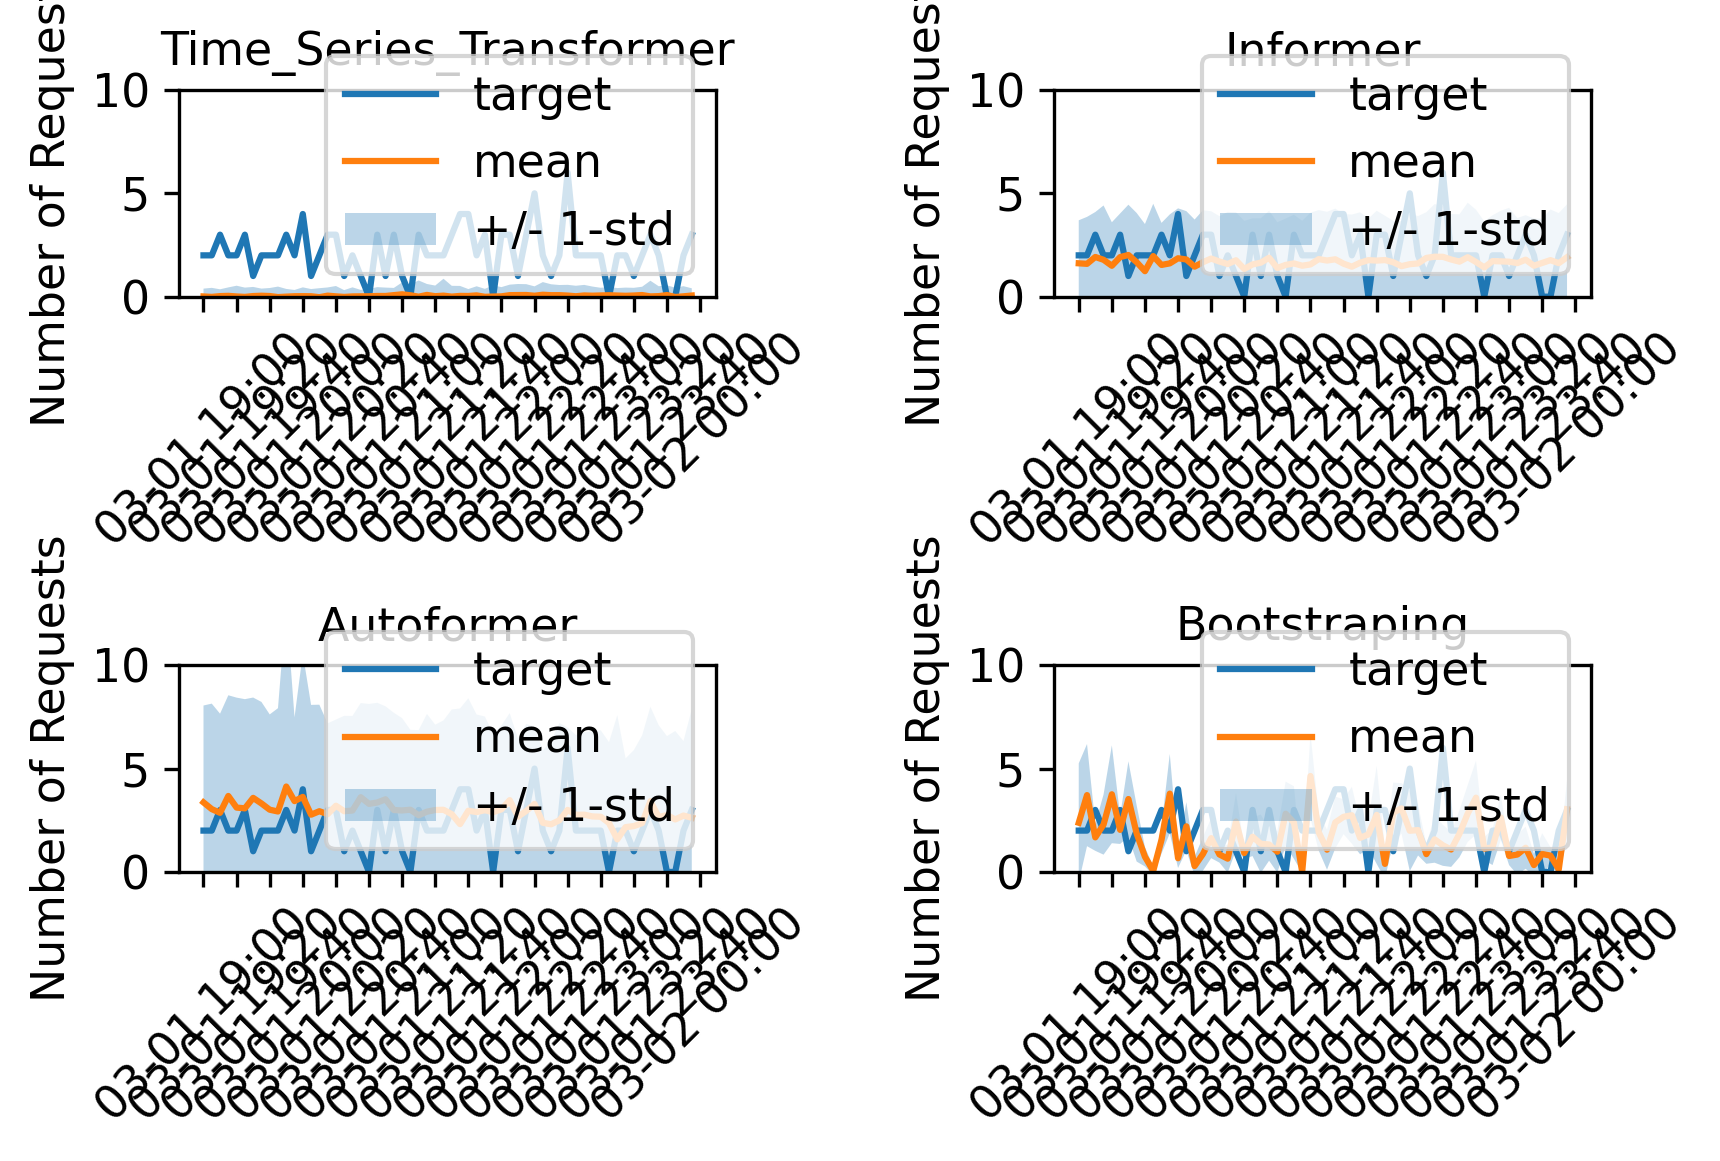

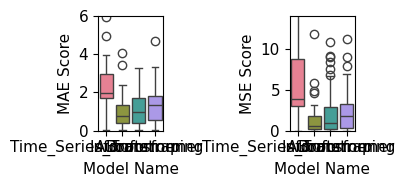

<Figure size 640x480 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

import matplotlib.pyplot as plt

# Set the font size
plt.rcParams.update({
    'font.size': 11,  # Base font size
    'axes.titlesize': 11,  # Title font size
    'axes.labelsize': 11,  # Label font size
    'xtick.labelsize': 11,  # X-axis tick label size
    'ytick.labelsize': 11,  # Y-axis tick label size
    'legend.fontsize': 11,  # Legend font size
})

def plot(ts_index, model_forecasts):
    fig, axes = plt.subplots(2, 2, figsize=(6 , 4), dpi=300)  # Create a 2x2 grid

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()

    #TODO we override the prediciton legnth here to get better approximation
    prediction_length = 12 * 5  # TODO this needs to be edited so that we could show the full back 24 hours intervals for our application!

    global metrics_df
    metrics_df = pd.DataFrame(columns=["Model Name", "MAE", "MSE"])

    axes = axes.flatten()

    for ax, (model_name, forecasts) in zip(axes, model_forecasts.items()):
        print(model_name)
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=20))
        ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=20))

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

        ax.tick_params(axis='x', rotation=45)
        
        ax.plot(
            index[-prediction_length:],
            [i if i else 0 for i in test_dataset[ts_index]["target"][-prediction_length:]],
            label="target",
        )

        forecasts_plot = forecasts[:, -prediction_length:]
        
        ax.plot(
            index[-prediction_length:],
            np.mean(forecasts_plot, axis=0),
            label="mean",
        )

        ax.fill_between(
            index[-prediction_length:],
            forecasts_plot.mean(0) - forecasts_plot.std(axis=0),
            forecasts_plot.mean(0) + forecasts_plot.std(axis=0),
            alpha=0.3,
            interpolate=True,
            label="+/- 1-std",
        )

        ax.set_ylim(bottom=0)
        ax.set_ylim(top=10)
        
        y_true = np.array([i if i else 0 for i in test_dataset[ts_index]["target"][-prediction_length:]])
        y_pred = np.mean(forecasts_plot, axis=0)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        
        new_row = {
            "Model Name": model_name,
            "MAE": abs(y_true - y_pred),
            "MSE": (y_true - y_pred)**2,
        }
        metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)
        ax.set_title(f'{model_name}')
        ax.set_ylabel('Number of Requests')
        ax.legend()

    plt.tight_layout()
    plt.show()
    fig.savefig("final_results/example_time_series_predictions.png", dpi=300, bbox_inches='tight')
    

    selected_model = 'Informer'
    informer_mae = metrics_df[metrics_df['Model Name'] == selected_model]['MAE'].values[0]
    bootstraping_mae = metrics_df[metrics_df['Model Name'] == 'Bootstraping']['MAE'].values[0]

    informer_mse = metrics_df[metrics_df['Model Name'] == selected_model]['MSE'].values[0]
    bootstraping_mse = metrics_df[metrics_df['Model Name'] == 'Bootstraping']['MSE'].values[0]

    mae_ratio = (1 - informer_mae.mean() / bootstraping_mae.mean()) * 100
    mse_ratio = (1 - informer_mse.mean() / bootstraping_mse.mean()) * 100
    
    mae_long_df = metrics_df.explode('MAE')[['Model Name', 'MAE']]
    mse_long_df = metrics_df.explode('MSE')[['Model Name', 'MSE']]

    mae_long_df.columns = ['Model Name', 'Score']
    mse_long_df.columns = ['Model Name', 'Score']

    mae_long_df['Metric'] = 'MAE'
    mse_long_df['Metric'] = 'MSE'

    metrics_long_df = pd.concat([mae_long_df, mse_long_df])

    palette_mae = sns.color_palette("husl", len(mae_long_df["Model Name"].unique()))
    palette_mse = sns.color_palette("husl", len(mse_long_df["Model Name"].unique()))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 2))

    sns.boxplot(x="Model Name", y="Score", data=mae_long_df, ax=axes[0], palette=palette_mae)
    axes[0].set_ylabel('MAE Score')
    # axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(0, 6)

    sns.boxplot(x="Model Name", y="Score", data=mse_long_df, ax=axes[1], palette=palette_mse) #alternatively use violinplot
    axes[1].set_ylabel('MSE Score')
    # axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylim(0, 14)

    # Adjust layout
    plt.tight_layout()
    plt.show()
    


    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Save the plot
    fig.savefig('final_results/box_plot_comparison_of_MAE_and_MSE_for_selected_model.png')

    return metrics_long_df

metrics_long_df = plot(0, models_forecasts)

In [ ]:
RECOMPUTE_EVALUATION = False
if RECOMPUTE_EVALUATION:
    df = pd.DataFrame({'dates': index[-prediction_length:], 'targets': models_forecasts['Informer'].mean(axis=0).round().astype(int)})
    df.to_csv('final_predictions.csv', index=False)
    df

In [33]:
metrics_df


NameError: name 'metrics_df' is not defined

In [34]:


def safe_mean(x):
   return sum(x) / len(x)

# Compute means for MAE and MSE columns
metrics_df['MAE_Mean'] = metrics_df['MAE'].apply(safe_mean)
metrics_df['MSE_Mean'] = metrics_df['MSE'].apply(safe_mean)
metrics_df

NameError: name 'metrics_df' is not defined

In [35]:
informer_mse = metrics_df.loc[metrics_df['Model Name'] == 'Informer', 'MSE_Mean'].values[0]
metrics_df['MSE_ratio'] = (metrics_df['MSE_Mean'] / informer_mse - 1) * 100

informer_mse = metrics_df.loc[metrics_df['Model Name'] == 'Informer', 'MAE_Mean'].values[0]
metrics_df['MAE_ratio'] = (metrics_df['MAE_Mean'] / informer_mse - 1) * 100

metrics_df.round(2)

NameError: name 'metrics_df' is not defined